In [541]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import string
from tabulate import tabulate
from wordcloud import WordCloud

In [542]:
df = pd.read_csv(r"C:\Users\gabri\Downloads\StanChart_since_2018_01_01.csv")

In [543]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3479 entries, 0 to 3478
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3479 non-null   int64 
 1   Link        3479 non-null   object
 2   Username    3479 non-null   object
 3   Tweet       3479 non-null   object
 4   Date        3479 non-null   object
 5   Likes       3479 non-null   int64 
 6   Comments    3479 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 190.4+ KB


In [544]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,Link,Username,Tweet,Date,Likes,Comments
0,https://twitter.com/StanChart/status/174915103...,@StanChart,Please be assured our team will look into this...,"Jan 21, 2024 · 7:24 PM UTC",0,1
1,https://twitter.com/StanChart/status/174913266...,@StanChart,Since it has been shared on a public domain. B...,"Jan 21, 2024 · 6:11 PM UTC",0,0
2,https://twitter.com/StanChart/status/174913252...,@StanChart,"Hello Mr.Srimann, this is not the experience w...","Jan 21, 2024 · 6:11 PM UTC",0,0
3,https://twitter.com/StanChart/status/174912800...,@StanChart,"Hi Rahul, this is not the experience which we ...","Jan 21, 2024 · 5:53 PM UTC",0,0
4,https://twitter.com/StanChart/status/174907893...,@StanChart,Thank you for sharing the numbers. Kindly shar...,"Jan 21, 2024 · 2:38 PM UTC",0,0


In [545]:
df['Tweet'] = df['Tweet'].astype(str)

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Sample documents
documents = df['Tweet'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 1
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=['people','just','like','http','did','know','need','make', 'luck', 'gon', 'na', 'doe'], 
                             ngram_range=(1, 1))),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents)

# Modify the word of interest and convert it to lowercase
word_of_interest = 'foreign'
word_of_interest = word_of_interest.lower()

# Count the frequency of the word within each document (case-insensitive)
word_frequency = {}

for doc in preprocessed_documents:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    if word_of_interest in doc_lower:
        word_frequency[doc] = doc_lower.count(word_of_interest)

# Initialize total count
total_count = 0

# Count the frequency of the word within each document (case-insensitive)
for doc in preprocessed_documents:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    # Count occurrences of the word
    total_count += doc_lower.count(word_of_interest)

# Print the total count
print(f"Total frequency of '{word_of_interest}': {total_count}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Total frequency of 'foreign': 2


In [546]:
df['Tweet'] = df['Tweet'].astype(str)

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Sample documents
documents = df['Tweet'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 1
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=['people','just','like','http','did','know','need','make', 'luck', 'gon', 'na', 'doe'], 
                             ngram_range=(1, 1))),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents)

# Modify the word of interest and convert it to lowercase
word_of_interest = 'exchange'
word_of_interest = word_of_interest.lower()

# Count the frequency of the word within each document (case-insensitive)
word_frequency = {}

for doc in preprocessed_documents:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    if word_of_interest in doc_lower:
        word_frequency[doc] = doc_lower.count(word_of_interest)

# Initialize total count
total_count = 0

# Count the frequency of the word within each document (case-insensitive)
for doc in preprocessed_documents:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    # Count occurrences of the word
    total_count += doc_lower.count(word_of_interest)

# Print the total count
print(f"Total frequency of '{word_of_interest}': {total_count}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Total frequency of 'exchange': 0


In [547]:
df['Tweet'] = df['Tweet'].astype(str)

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Sample documents
documents = df['Tweet'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 1
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=['people','just','like','http','did','know','need','make', 'luck', 'gon', 'na', 'doe'], 
                             ngram_range=(1, 1))),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents)

# Modify the word of interest and convert it to lowercase
word_of_interest = 'rate'
word_of_interest = word_of_interest.lower()

# Count the frequency of the word within each document (case-insensitive)
word_frequency = {}

for doc in preprocessed_documents:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    if word_of_interest in doc_lower:
        word_frequency[doc] = doc_lower.count(word_of_interest)

# Initialize total count
total_count = 0

# Count the frequency of the word within each document (case-insensitive)
for doc in preprocessed_documents:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    # Count occurrences of the word
    total_count += doc_lower.count(word_of_interest)

# Print the total count
print(f"Total frequency of '{word_of_interest}': {total_count}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Total frequency of 'rate': 168


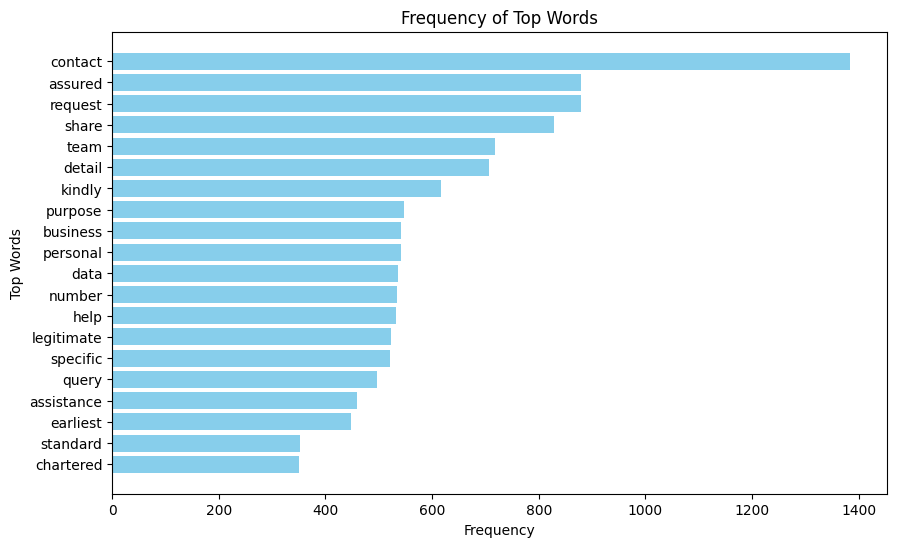

Top Words      Frequency
-----------  -----------
contact             1384
assured              880
request              880
share                829
team                 718
detail               706
kindly               616
purpose              547
business             542
personal             541
data                 536
number               535
help                 533
legitimate           522
specific             521
query                496
assistance           460
earliest             448
standard             353
chartered            350


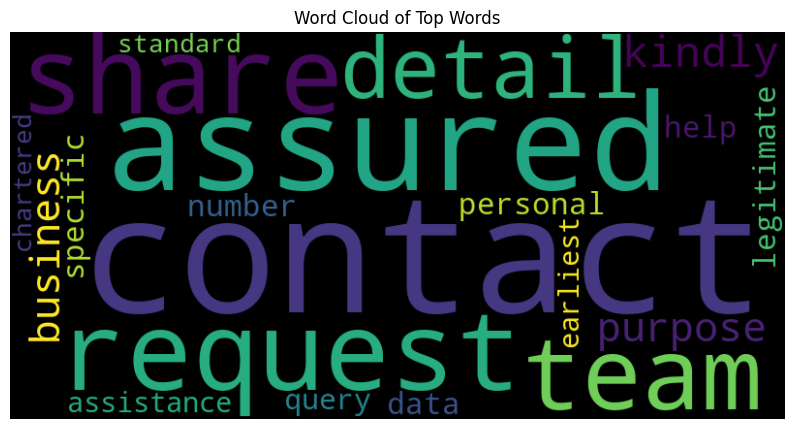

In [548]:
# Sample documents
documents = df['Tweet'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 1
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=['like', 'make','need', 'http', 'hi', 'dm', 'thank'], ngram_range=(1,1))),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents)

# Get the top words for each topic
feature_names = pipeline.named_steps['vect'].get_feature_names_out()
lda_components = pipeline.named_steps['lda'].components_
top_words_per_topic = []

for topic_weights in lda_components:
    top_word_indices = topic_weights.argsort()[-20:][::-1]
    top_words = [feature_names[i] for i in top_word_indices]
    top_words_per_topic.append(top_words)

# Count the frequency of each top word within each document
top_word_counts = {}

for doc in preprocessed_documents:
    for top_words in top_words_per_topic:
        for word in top_words:
            if word in doc:
                if word in top_word_counts:
                    top_word_counts[word] += 1
                else:
                    top_word_counts[word] = 1

# Sort the top words by frequency
sorted_top_words = sorted(top_word_counts.items(), key=lambda x: x[1], reverse=True)

# Extract top words and their frequencies
top_words = [word for word, count in sorted_top_words]
word_frequencies = [count for word, count in sorted_top_words]

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_words)), word_frequencies, color='skyblue')
plt.yticks(range(len(top_words)), labels=top_words)
plt.xlabel('Frequency')
plt.ylabel('Top Words')
plt.title('Frequency of Top Words')
plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent word on top
plt.show()

# Create a table
table_data = [(word, freq) for word, freq in zip(top_words, word_frequencies)]

# Print the table
print(tabulate(table_data, headers=['Top Words', 'Frequency']))

# Combine top words and their frequencies into a dictionary
word_freq_dict = {word: freq for word, freq in zip(top_words, word_frequencies)}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freq_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Words')
plt.show()

In [549]:
df2 = pd.read_csv(r"C:\Users\gabri\Downloads\Barclays_since_2018_01_01.csv")

In [550]:
df2.drop_duplicates(inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  856 non-null    int64 
 1   Link        856 non-null    object
 2   Username    856 non-null    object
 3   Tweet       856 non-null    object
 4   Date        856 non-null    object
 5   Likes       856 non-null    int64 
 6   Comments    856 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 46.9+ KB


In [551]:
df2.drop('Unnamed: 0', axis=1, inplace=True)
df2.head()

,Link,Username,Tweet,Date,Likes,Comments
0,https://twitter.com/Barclays/status/1747719298...,@Barclays,"Hi Carl 👋 Thanks for reaching out, it will dep...","Jan 17, 2024 · 8:35 PM UTC",1,0
1,https://twitter.com/Barclays/status/1746282877...,@Barclays,If you need help with something specific could...,"Jan 13, 2024 · 9:27 PM UTC",0,0
2,https://twitter.com/Barclays/status/1746282608...,@Barclays,"Hi, thanks for getting in touch. I’m really so...","Jan 13, 2024 · 9:26 PM UTC",0,2
3,https://twitter.com/Barclays/status/1745797933...,@Barclays,has been fixed 👉 https://status.uk.barclays/ ...,"Jan 12, 2024 · 1:20 PM UTC",0,0
4,https://twitter.com/Barclays/status/1745592235...,@Barclays,"If you’d prefer, I can make a call to you but ...","Jan 11, 2024 · 11:43 PM UTC",0,0


In [552]:
df2['Tweet'] = df2['Tweet'].astype(str)

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Sample documents
documents2 = df2['Tweet'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents2 = [preprocess_text(doc) for doc in documents2]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 1
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=['people','just','like','http','did','know','need','make', 'luck', 'gon', 'na', 'doe'], 
                             ngram_range=(1, 1))),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents2)

# Modify the word of interest and convert it to lowercase
word_of_interest = 'foreign'
word_of_interest = word_of_interest.lower()

# Count the frequency of the word within each document (case-insensitive)
word_frequency = {}

for doc in preprocessed_documents2:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    if word_of_interest in doc_lower:
        word_frequency[doc] = doc_lower.count(word_of_interest)

# Initialize total count
total_count = 0

# Count the frequency of the word within each document (case-insensitive)
for doc in preprocessed_documents2:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    # Count occurrences of the word
    total_count += doc_lower.count(word_of_interest)

# Print the total count
print(f"Total frequency of '{word_of_interest}': {total_count}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Total frequency of 'foreign': 0


In [553]:
df2['Tweet'] = df2['Tweet'].astype(str)

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Sample documents
documents2 = df2['Tweet'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents2 = [preprocess_text(doc) for doc in documents2]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 1
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=['people','just','like','http','did','know','need','make', 'luck', 'gon', 'na', 'doe'], 
                             ngram_range=(1, 1))),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents2)

# Modify the word of interest and convert it to lowercase
word_of_interest = 'exchange'
word_of_interest = word_of_interest.lower()

# Count the frequency of the word within each document (case-insensitive)
word_frequency = {}

for doc in preprocessed_documents2:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    if word_of_interest in doc_lower:
        word_frequency[doc] = doc_lower.count(word_of_interest)

# Initialize total count
total_count = 0

# Count the frequency of the word within each document (case-insensitive)
for doc in preprocessed_documents2:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    # Count occurrences of the word
    total_count += doc_lower.count(word_of_interest)

# Print the total count
print(f"Total frequency of '{word_of_interest}': {total_count}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Total frequency of 'exchange': 0


In [554]:
df2['Tweet'] = df2['Tweet'].astype(str)

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Sample documents
documents2 = df2['Tweet'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents2 = [preprocess_text(doc) for doc in documents2]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 1
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=['people','just','like','http','did','know','need','make', 'luck', 'gon', 'na', 'doe'], 
                             ngram_range=(1, 1))),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents2)

# Modify the word of interest and convert it to lowercase
word_of_interest = 'rate'
word_of_interest = word_of_interest.lower()

# Count the frequency of the word within each document (case-insensitive)
word_frequency = {}

for doc in preprocessed_documents2:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    if word_of_interest in doc_lower:
        word_frequency[doc] = doc_lower.count(word_of_interest)

# Initialize total count
total_count = 0

# Count the frequency of the word within each document (case-insensitive)
for doc in preprocessed_documents2:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    # Count occurrences of the word
    total_count += doc_lower.count(word_of_interest)

# Print the total count
print(f"Total frequency of '{word_of_interest}': {total_count}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Total frequency of 'rate': 43


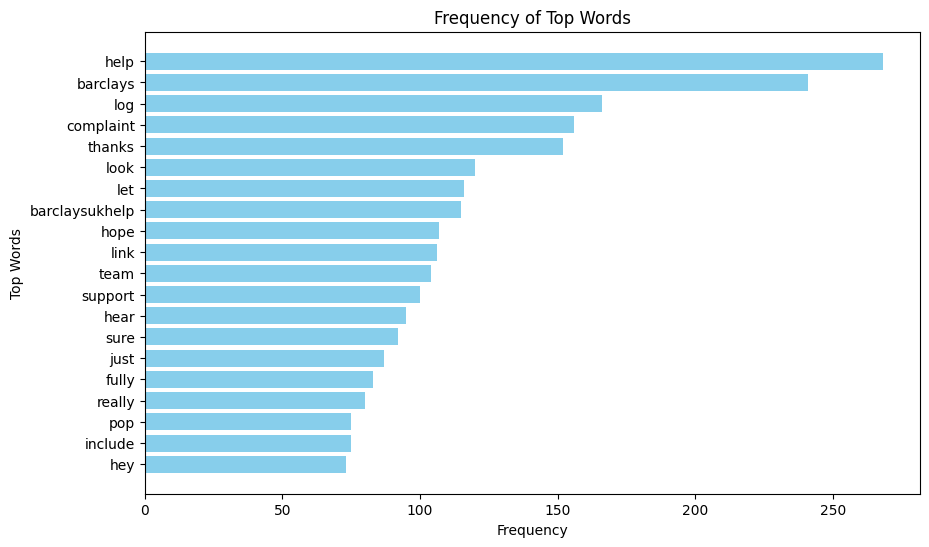

Top Words         Frequency
--------------  -----------
help                    268
barclays                241
log                     166
complaint               156
thanks                  152
look                    120
let                     116
barclaysukhelp          115
hope                    107
link                    106
team                    104
support                 100
hear                     95
sure                     92
just                     87
fully                    83
really                   80
pop                      75
include                  75
hey                      73


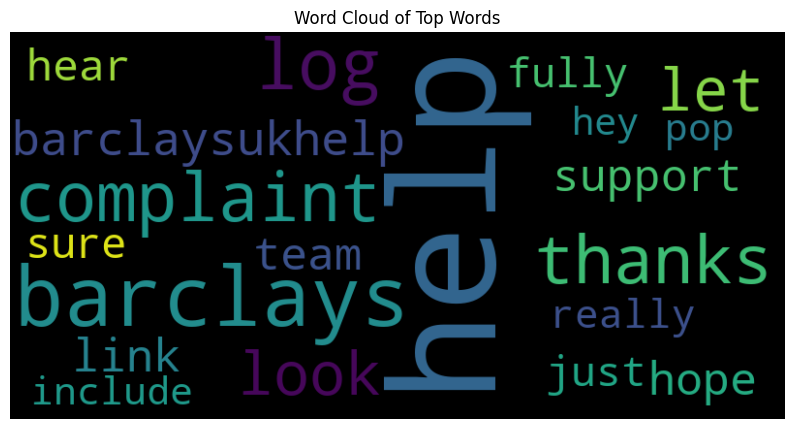

In [555]:
# Sample documents
documents = df2['Tweet'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 1
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=['like', 'make','need', 'http', 'hi', 'sorry', 'dm', 'know'], ngram_range=(1,1))),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents)

# Get the top words for each topic
feature_names = pipeline.named_steps['vect'].get_feature_names_out()
lda_components = pipeline.named_steps['lda'].components_
top_words_per_topic = []

for topic_weights in lda_components:
    top_word_indices = topic_weights.argsort()[-20:][::-1]
    top_words = [feature_names[i] for i in top_word_indices]
    top_words_per_topic.append(top_words)

# Count the frequency of each top word within each document
top_word_counts = {}

for doc in preprocessed_documents:
    for top_words in top_words_per_topic:
        for word in top_words:
            if word in doc:
                if word in top_word_counts:
                    top_word_counts[word] += 1
                else:
                    top_word_counts[word] = 1

# Sort the top words by frequency
sorted_top_words = sorted(top_word_counts.items(), key=lambda x: x[1], reverse=True)

# Extract top words and their frequencies
top_words = [word for word, count in sorted_top_words]
word_frequencies = [count for word, count in sorted_top_words]

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_words)), word_frequencies, color='skyblue')
plt.yticks(range(len(top_words)), labels=top_words)
plt.xlabel('Frequency')
plt.ylabel('Top Words')
plt.title('Frequency of Top Words')
plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent word on top
plt.show()

# Create a table
table_data = [(word, freq) for word, freq in zip(top_words, word_frequencies)]

# Print the table
print(tabulate(table_data, headers=['Top Words', 'Frequency']))

# Combine top words and their frequencies into a dictionary
word_freq_dict = {word: freq for word, freq in zip(top_words, word_frequencies)}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freq_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Words')
plt.show()

In [556]:
df3 = pd.read_csv(r"C:\Users\gabri\Downloads\DeutscheBank_since_2018_01_01.csv")

In [557]:
df3.drop_duplicates(inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5279 entries, 0 to 5278
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5279 non-null   int64 
 1   Link        5279 non-null   object
 2   Username    5279 non-null   object
 3   Tweet       5274 non-null   object
 4   Date        5279 non-null   object
 5   Likes       5279 non-null   int64 
 6   Comments    5279 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 288.8+ KB


In [558]:
df3.drop('Unnamed: 0', axis=1, inplace=True)
df3.head()

,Link,Username,Tweet,Date,Likes,Comments
0,https://twitter.com/DeutscheBank/status/174795...,@DeutscheBank,We understand your situation. In order to help...,"Jan 18, 2024 · 11:54 AM UTC",0,0
1,https://twitter.com/DeutscheBank/status/174762...,@DeutscheBank,Thanks for your feedback. The polite contact w...,"Jan 17, 2024 · 2:23 PM UTC",0,0
2,https://twitter.com/DeutscheBank/status/174753...,@DeutscheBank,"Of course, we understand that you are angry. H...","Jan 17, 2024 · 8:28 AM UTC",0,1
3,https://twitter.com/DeutscheBank/status/174732...,@DeutscheBank,Wir bedauern Ihren Ärger sehr. Leider können w...,"Jan 16, 2024 · 6:30 PM UTC",0,0
4,https://twitter.com/DeutscheBank/status/174730...,@DeutscheBank,We very much regret your annoyance. Unfortunat...,"Jan 16, 2024 · 5:12 PM UTC",0,1


In [559]:
df3['Tweet'] = df3['Tweet'].astype(str)

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Sample documents
documents3 = df3['Tweet'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents3 = [preprocess_text(doc) for doc in documents3]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 1
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=['people','just','like','http','did','know','need','make', 'luck', 'gon', 'na', 'doe'], 
                             ngram_range=(1, 1))),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents3)

# Modify the word of interest and convert it to lowercase
word_of_interest = 'foreign'
word_of_interest = word_of_interest.lower()

# Count the frequency of the word within each document (case-insensitive)
word_frequency = {}

for doc in preprocessed_documents3:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    if word_of_interest in doc_lower:
        word_frequency[doc] = doc_lower.count(word_of_interest)

# Initialize total count
total_count = 0

# Count the frequency of the word within each document (case-insensitive)
for doc in preprocessed_documents3:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    # Count occurrences of the word
    total_count += doc_lower.count(word_of_interest)

# Print the total count
print(f"Total frequency of '{word_of_interest}': {total_count}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Total frequency of 'foreign': 33


In [560]:
df3['Tweet'] = df3['Tweet'].astype(str)

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Sample documents
documents3 = df3['Tweet'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents3 = [preprocess_text(doc) for doc in documents3]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 1
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=['people','just','like','http','did','know','need','make', 'luck', 'gon', 'na', 'doe'], 
                             ngram_range=(1, 1))),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents3)

# Modify the word of interest and convert it to lowercase
word_of_interest = 'exchange'
word_of_interest = word_of_interest.lower()

# Count the frequency of the word within each document (case-insensitive)
word_frequency = {}

for doc in preprocessed_documents3:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    if word_of_interest in doc_lower:
        word_frequency[doc] = doc_lower.count(word_of_interest)

# Initialize total count
total_count = 0

# Count the frequency of the word within each document (case-insensitive)
for doc in preprocessed_documents3:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    # Count occurrences of the word
    total_count += doc_lower.count(word_of_interest)

# Print the total count
print(f"Total frequency of '{word_of_interest}': {total_count}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Total frequency of 'exchange': 23


In [585]:
df3['Tweet'] = df3['Tweet'].astype(str)

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Sample documents
documents3 = df3['Tweet'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents3 = [preprocess_text(doc) for doc in documents3]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 1
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=['people','just','like','http','did','know','need','make', 'luck', 'gon', 'na', 'doe'], 
                             ngram_range=(1, 1))),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents3)

# Modify the word of interest and convert it to lowercase
word_of_interest = 'bank'
word_of_interest = word_of_interest.lower()

# Count the frequency of the word within each document (case-insensitive)
word_frequency = {}

for doc in preprocessed_documents3:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    if word_of_interest in doc_lower:
        word_frequency[doc] = doc_lower.count(word_of_interest)

# Initialize total count
total_count = 0

# Count the frequency of the word within each document (case-insensitive)
for doc in preprocessed_documents3:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    # Count occurrences of the word
    total_count += doc_lower.count(word_of_interest)

# Print the total count
print(f"Total frequency of '{word_of_interest}': {total_count}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Total frequency of 'bank': 2602


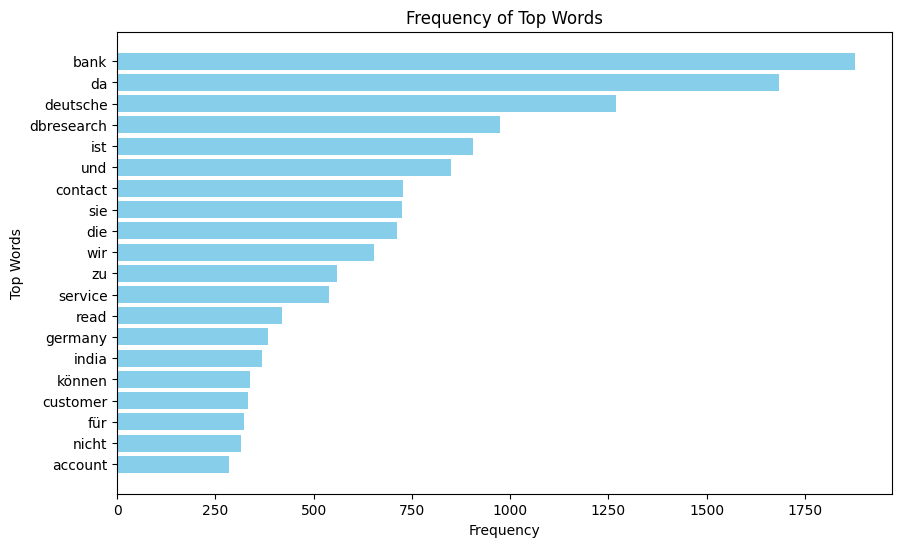

Top Words      Frequency
-----------  -----------
bank                1878
da                  1685
deutsche            1269
dbresearch           975
ist                  905
und                  850
contact              727
sie                  724
die                  712
wir                  653
zu                   560
service              538
read                 420
germany              385
india                368
können               339
customer             332
für                  322
nicht                315
account              284


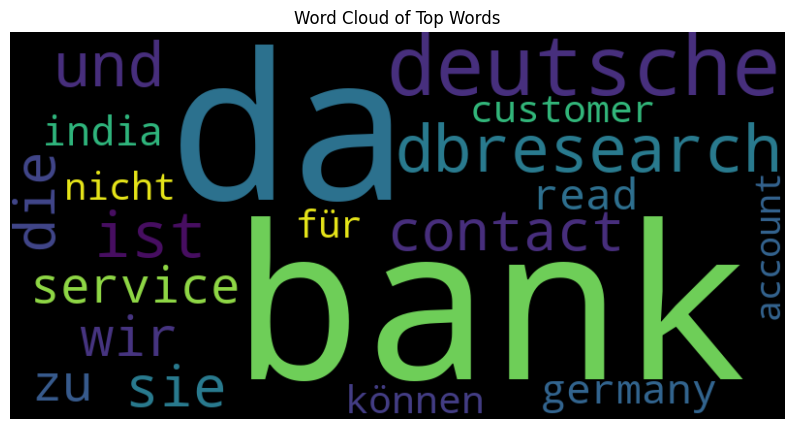

In [584]:
df3['Tweet'] = df3['Tweet'].astype(str)

# Sample documents
documents = df3['Tweet'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 1
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=['like', 'make','need', 'http', 'un', 'der'], ngram_range=(1,1))),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents)

# Get the top words for each topic
feature_names = pipeline.named_steps['vect'].get_feature_names_out()
lda_components = pipeline.named_steps['lda'].components_
top_words_per_topic = []

for topic_weights in lda_components:
    top_word_indices = topic_weights.argsort()[-20:][::-1]
    top_words = [feature_names[i] for i in top_word_indices]
    top_words_per_topic.append(top_words)

# Count the frequency of each top word within each document
top_word_counts = {}

for doc in preprocessed_documents:
    for top_words in top_words_per_topic:
        for word in top_words:
            if word in doc:
                if word in top_word_counts:
                    top_word_counts[word] += 1
                else:
                    top_word_counts[word] = 1

# Sort the top words by frequency
sorted_top_words = sorted(top_word_counts.items(), key=lambda x: x[1], reverse=True)

# Extract top words and their frequencies
top_words = [word for word, count in sorted_top_words]
word_frequencies = [count for word, count in sorted_top_words]

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_words)), word_frequencies, color='skyblue')
plt.yticks(range(len(top_words)), labels=top_words)
plt.xlabel('Frequency')
plt.ylabel('Top Words')
plt.title('Frequency of Top Words')
plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent word on top
plt.show()

# Create a table
table_data = [(word, freq) for word, freq in zip(top_words, word_frequencies)]

# Print the table
print(tabulate(table_data, headers=['Top Words', 'Frequency']))

# Combine top words and their frequencies into a dictionary
word_freq_dict = {word: freq for word, freq in zip(top_words, word_frequencies)}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freq_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Words')
plt.show()

In [563]:
df4 = pd.read_csv(r"C:\Users\gabri\Downloads\LloydsBank_since_2018_01_01.csv")

In [564]:
df4.drop_duplicates(inplace=True)
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4520 non-null   int64 
 1   Link        4520 non-null   object
 2   Username    4520 non-null   object
 3   Tweet       4510 non-null   object
 4   Date        4520 non-null   object
 5   Likes       4520 non-null   int64 
 6   Comments    4520 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 247.3+ KB


In [565]:
df4.drop('Unnamed: 0', axis=1, inplace=True)
df4.head()

,Link,Username,Tweet,Date,Likes,Comments
0,https://twitter.com/LloydsBank/status/17490141...,@LloydsBank,"You’re welcome, Andy. Take care. ^John","Jan 21, 2024 · 10:20 AM UTC",0,0
1,https://twitter.com/LloydsBank/status/17490087...,@LloydsBank,"Hi, I'm Laura. Sorry to hear about your experi...","Jan 21, 2024 · 9:59 AM UTC",1,1
2,https://twitter.com/LloydsBank/status/17489811...,@LloydsBank,You're welcome. I'm unable to access the link ...,"Jan 21, 2024 · 8:09 AM UTC",0,0
3,https://twitter.com/LloydsBank/status/17489741...,@LloydsBank,"You're welcome, Yannis. This was never designe...","Jan 21, 2024 · 7:41 AM UTC",0,1
4,https://twitter.com/LloydsBank/status/17489586...,@LloydsBank,"Hi, Yannis. Thanks for getting in touch. If yo...","Jan 21, 2024 · 6:40 AM UTC",0,1


In [566]:
df4['Tweet'] = df4['Tweet'].astype(str)

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Sample documents
documents4 = df4['Tweet'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents4 = [preprocess_text(doc) for doc in documents4]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 1
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=['people','just','like','http','did','know','need','make', 'luck', 'gon', 'na', 'doe'], 
                             ngram_range=(1, 1))),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents4)

# Modify the word of interest and convert it to lowercase
word_of_interest = 'foreign'
word_of_interest = word_of_interest.lower()

# Count the frequency of the word within each document (case-insensitive)
word_frequency = {}

for doc in preprocessed_documents4:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    if word_of_interest in doc_lower:
        word_frequency[doc] = doc_lower.count(word_of_interest)

# Initialize total count
total_count = 0

# Count the frequency of the word within each document (case-insensitive)
for doc in preprocessed_documents4:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    # Count occurrences of the word
    total_count += doc_lower.count(word_of_interest)

# Print the total count
print(f"Total frequency of '{word_of_interest}': {total_count}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Total frequency of 'foreign': 5


In [567]:
df4['Tweet'] = df4['Tweet'].astype(str)

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Sample documents
documents4 = df4['Tweet'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents4 = [preprocess_text(doc) for doc in documents4]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 1
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=['people','just','like','http','did','know','need','make', 'luck', 'gon', 'na', 'doe'], 
                             ngram_range=(1, 1))),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents4)

# Modify the word of interest and convert it to lowercase
word_of_interest = 'exchange'
word_of_interest = word_of_interest.lower()

# Count the frequency of the word within each document (case-insensitive)
word_frequency = {}

for doc in preprocessed_documents4:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    if word_of_interest in doc_lower:
        word_frequency[doc] = doc_lower.count(word_of_interest)

# Initialize total count
total_count = 0

# Count the frequency of the word within each document (case-insensitive)
for doc in preprocessed_documents4:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    # Count occurrences of the word
    total_count += doc_lower.count(word_of_interest)

# Print the total count
print(f"Total frequency of '{word_of_interest}': {total_count}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Total frequency of 'exchange': 13


In [568]:
df4['Tweet'] = df4['Tweet'].astype(str)

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Sample documents
documents4 = df4['Tweet'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents4 = [preprocess_text(doc) for doc in documents4]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 1
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=['people','just','like','http','did','know','need','make', 'luck', 'gon', 'na', 'doe'], 
                             ngram_range=(1, 1))),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents4)

# Modify the word of interest and convert it to lowercase
word_of_interest = 'rate'
word_of_interest = word_of_interest.lower()

# Count the frequency of the word within each document (case-insensitive)
word_frequency = {}

for doc in preprocessed_documents4:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    if word_of_interest in doc_lower:
        word_frequency[doc] = doc_lower.count(word_of_interest)

# Initialize total count
total_count = 0

# Count the frequency of the word within each document (case-insensitive)
for doc in preprocessed_documents4:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    # Count occurrences of the word
    total_count += doc_lower.count(word_of_interest)

# Print the total count
print(f"Total frequency of '{word_of_interest}': {total_count}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Total frequency of 'rate': 78


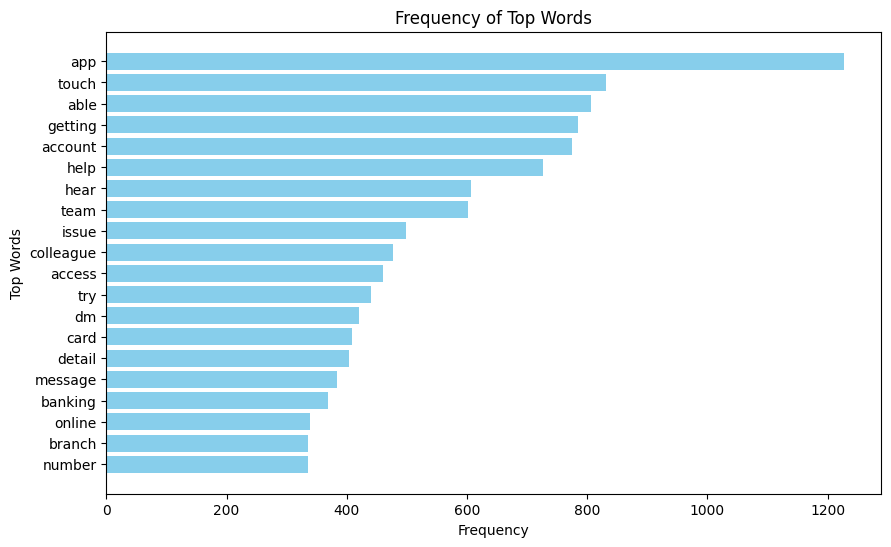

Top Words      Frequency
-----------  -----------
app                 1228
touch                832
able                 806
getting              784
account              775
help                 727
hear                 606
team                 602
issue                499
colleague            476
access               461
try                  440
dm                   421
card                 409
detail               404
message              384
banking              369
online               338
branch               335
number               335


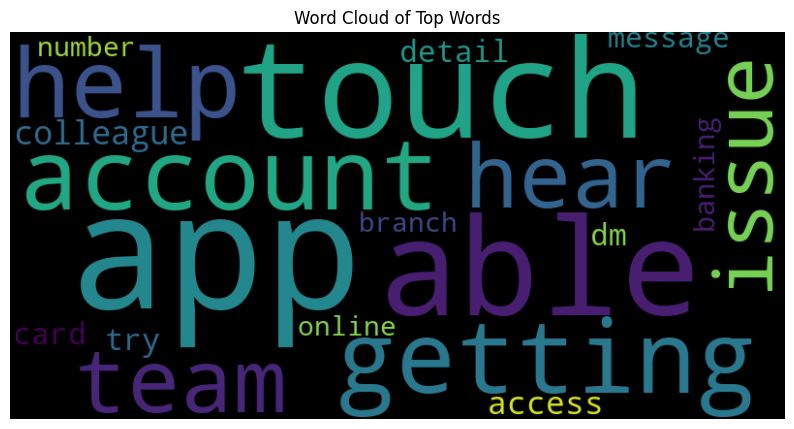

In [569]:
# Sample documents
documents = df4['Tweet'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 1
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=['like', 'make','need', 'http', 'hi', 'sorry', 'thanks'], ngram_range=(1,1))),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents)

# Get the top words for each topic
feature_names = pipeline.named_steps['vect'].get_feature_names_out()
lda_components = pipeline.named_steps['lda'].components_
top_words_per_topic = []

for topic_weights in lda_components:
    top_word_indices = topic_weights.argsort()[-20:][::-1]
    top_words = [feature_names[i] for i in top_word_indices]
    top_words_per_topic.append(top_words)

# Count the frequency of each top word within each document
top_word_counts = {}

for doc in preprocessed_documents:
    for top_words in top_words_per_topic:
        for word in top_words:
            if word in doc:
                if word in top_word_counts:
                    top_word_counts[word] += 1
                else:
                    top_word_counts[word] = 1

# Sort the top words by frequency
sorted_top_words = sorted(top_word_counts.items(), key=lambda x: x[1], reverse=True)

# Extract top words and their frequencies
top_words = [word for word, count in sorted_top_words]
word_frequencies = [count for word, count in sorted_top_words]

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_words)), word_frequencies, color='skyblue')
plt.yticks(range(len(top_words)), labels=top_words)
plt.xlabel('Frequency')
plt.ylabel('Top Words')
plt.title('Frequency of Top Words')
plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent word on top
plt.show()

# Create a table
table_data = [(word, freq) for word, freq in zip(top_words, word_frequencies)]

# Print the table
print(tabulate(table_data, headers=['Top Words', 'Frequency']))

# Combine top words and their frequencies into a dictionary
word_freq_dict = {word: freq for word, freq in zip(top_words, word_frequencies)}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freq_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Words')
plt.show()

In [570]:
df5 = pd.read_csv(r"C:\Users\gabri\Downloads\ING_news_since_2018_01_01.csv")

In [571]:
df5.drop_duplicates(inplace=True)
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1078 non-null   int64 
 1   Link        1078 non-null   object
 2   Username    1078 non-null   object
 3   Tweet       1078 non-null   object
 4   Date        1078 non-null   object
 5   Likes       1078 non-null   int64 
 6   Comments    1078 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 59.1+ KB


In [572]:
df5.drop('Unnamed: 0', axis=1, inplace=True)
df5.head()

,Link,Username,Tweet,Date,Likes,Comments
0,https://twitter.com/ING_news/status/1745829827...,@ING_news,"Hello, thanks for reaching out, please head to...","Jan 12, 2024 · 3:27 PM UTC",0,0
1,https://twitter.com/ING_news/status/1745480333...,@ING_news,"Hello, sorry to hear about the difficulties yo...","Jan 11, 2024 · 4:18 PM UTC",0,0
2,https://twitter.com/ING_news/status/1740412804...,@ING_news,Thank you for bringing this to our attention.,"Dec 28, 2023 · 4:42 PM UTC",0,0
3,https://twitter.com/ING_news/status/1738218498...,@ING_news,"Hello Julien, thanks for reaching out. From wh...","Dec 22, 2023 · 3:22 PM UTC",0,0
4,https://twitter.com/ING_news/status/1737792136...,@ING_news,Thank you for reaching out Jennifer and sorry ...,"Dec 21, 2023 · 11:08 AM UTC",0,0


In [573]:
df5['Tweet'] = df5['Tweet'].astype(str)

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Sample documents
documents5 = df5['Tweet'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents5 = [preprocess_text(doc) for doc in documents5]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 1
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=['people','just','like','http','did','know','need','make', 'luck', 'gon', 'na', 'doe'], 
                             ngram_range=(1, 1))),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents5)

# Modify the word of interest and convert it to lowercase
word_of_interest = 'foreign'
word_of_interest = word_of_interest.lower()

# Count the frequency of the word within each document (case-insensitive)
word_frequency = {}

for doc in preprocessed_documents5:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    if word_of_interest in doc_lower:
        word_frequency[doc] = doc_lower.count(word_of_interest)

# Initialize total count
total_count = 0

# Count the frequency of the word within each document (case-insensitive)
for doc in preprocessed_documents5:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    # Count occurrences of the word
    total_count += doc_lower.count(word_of_interest)

# Print the total count
print(f"Total frequency of '{word_of_interest}': {total_count}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Total frequency of 'foreign': 0


In [574]:
df5['Tweet'] = df5['Tweet'].astype(str)

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Sample documents
documents5 = df5['Tweet'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents5 = [preprocess_text(doc) for doc in documents5]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 1
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=['people','just','like','http','did','know','need','make', 'luck', 'gon', 'na', 'doe'], 
                             ngram_range=(1, 1))),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents5)

# Modify the word of interest and convert it to lowercase
word_of_interest = 'exchange'
word_of_interest = word_of_interest.lower()

# Count the frequency of the word within each document (case-insensitive)
word_frequency = {}

for doc in preprocessed_documents5:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    if word_of_interest in doc_lower:
        word_frequency[doc] = doc_lower.count(word_of_interest)

# Initialize total count
total_count = 0

# Count the frequency of the word within each document (case-insensitive)
for doc in preprocessed_documents5:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    # Count occurrences of the word
    total_count += doc_lower.count(word_of_interest)

# Print the total count
print(f"Total frequency of '{word_of_interest}': {total_count}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Total frequency of 'exchange': 2


In [575]:
df5['Tweet'] = df5['Tweet'].astype(str)

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Sample documents
documents5 = df5['Tweet'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents5 = [preprocess_text(doc) for doc in documents5]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 1
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=['people','just','like','http','did','know','need','make', 'luck', 'gon', 'na', 'doe'], 
                             ngram_range=(1, 1))),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents5)

# Modify the word of interest and convert it to lowercase
word_of_interest = 'rate'
word_of_interest = word_of_interest.lower()

# Count the frequency of the word within each document (case-insensitive)
word_frequency = {}

for doc in preprocessed_documents5:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    if word_of_interest in doc_lower:
        word_frequency[doc] = doc_lower.count(word_of_interest)

# Initialize total count
total_count = 0

# Count the frequency of the word within each document (case-insensitive)
for doc in preprocessed_documents5:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    # Count occurrences of the word
    total_count += doc_lower.count(word_of_interest)

# Print the total count
print(f"Total frequency of '{word_of_interest}': {total_count}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Total frequency of 'rate': 151


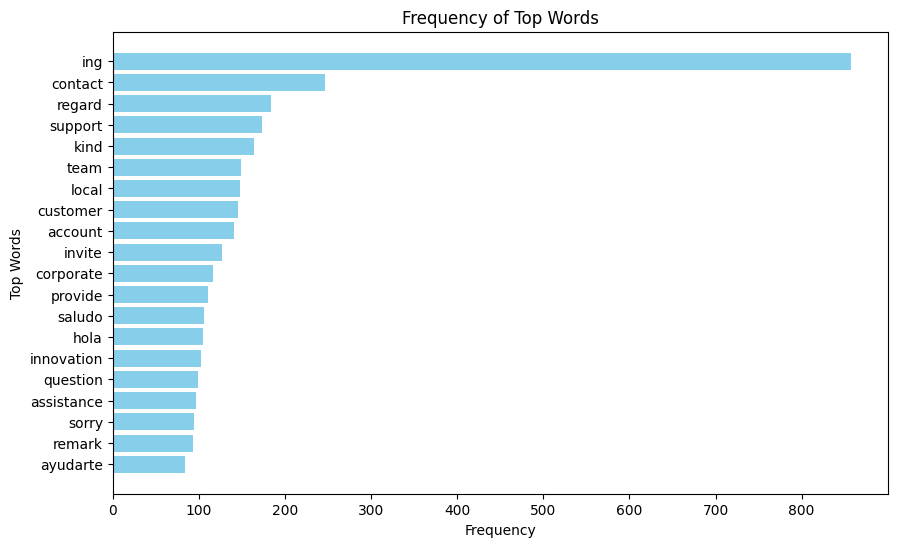

Top Words      Frequency
-----------  -----------
ing                  857
contact              247
regard               184
support              173
kind                 164
team                 149
local                148
customer             145
account              141
invite               127
corporate            117
provide              111
saludo               106
hola                 105
innovation           102
question              99
assistance            97
sorry                 95
remark                93
ayudarte              84


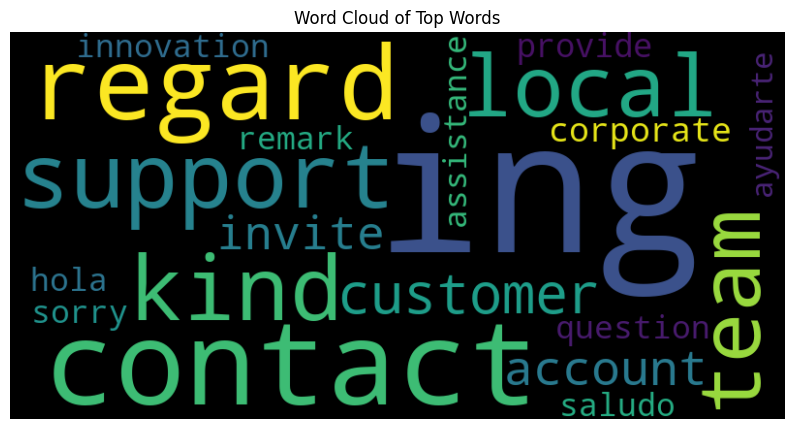

In [576]:
# Sample documents
documents = df5['Tweet'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 1
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=['like', 'make','need', 'http', 'hi', 'je'], ngram_range=(1,1))),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents)

# Get the top words for each topic
feature_names = pipeline.named_steps['vect'].get_feature_names_out()
lda_components = pipeline.named_steps['lda'].components_
top_words_per_topic = []

for topic_weights in lda_components:
    top_word_indices = topic_weights.argsort()[-20:][::-1]
    top_words = [feature_names[i] for i in top_word_indices]
    top_words_per_topic.append(top_words)

# Count the frequency of each top word within each document
top_word_counts = {}

for doc in preprocessed_documents:
    for top_words in top_words_per_topic:
        for word in top_words:
            if word in doc:
                if word in top_word_counts:
                    top_word_counts[word] += 1
                else:
                    top_word_counts[word] = 1

# Sort the top words by frequency
sorted_top_words = sorted(top_word_counts.items(), key=lambda x: x[1], reverse=True)

# Extract top words and their frequencies
top_words = [word for word, count in sorted_top_words]
word_frequencies = [count for word, count in sorted_top_words]

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_words)), word_frequencies, color='skyblue')
plt.yticks(range(len(top_words)), labels=top_words)
plt.xlabel('Frequency')
plt.ylabel('Top Words')
plt.title('Frequency of Top Words')
plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent word on top
plt.show()

# Create a table
table_data = [(word, freq) for word, freq in zip(top_words, word_frequencies)]

# Print the table
print(tabulate(table_data, headers=['Top Words', 'Frequency']))

# Combine top words and their frequencies into a dictionary
word_freq_dict = {word: freq for word, freq in zip(top_words, word_frequencies)}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freq_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Words')
plt.show()

In [577]:
df6 = pd.read_csv(r"C:\Users\gabri\Downloads\UniCredit_PR_since_2018_01_01.csv")

In [578]:
df6.drop_duplicates(inplace=True)
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2583 non-null   int64 
 1   Link        2583 non-null   object
 2   Username    2583 non-null   object
 3   Tweet       2583 non-null   object
 4   Date        2583 non-null   object
 5   Likes       2583 non-null   int64 
 6   Comments    2583 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 141.4+ KB


In [579]:
df6.drop('Unnamed: 0', axis=1, inplace=True)
df6.head()

,Link,Username,Tweet,Date,Likes,Comments
0,https://twitter.com/UniCredit_PR/status/174828...,@UniCredit_PR,#OurFuture: Steel represents the backbone of t...,"Jan 19, 2024 · 9:57 AM UTC",4,0
1,https://twitter.com/UniCredit_PR/status/174791...,@UniCredit_PR,#UniCredit celebrates being named @topemployer...,"Jan 18, 2024 · 9:47 AM UTC",9,0
2,https://twitter.com/UniCredit_PR/status/174765...,@UniCredit_PR,🤔 How much do you know about finance and banki...,"Jan 17, 2024 · 4:36 PM UTC",4,0
3,https://twitter.com/UniCredit_PR/status/174757...,@UniCredit_PR,🌎 #UniCredit is the lead sponsor of The @eurom...,"Jan 17, 2024 · 10:51 AM UTC",4,0
4,https://twitter.com/classcnbc/status/174755183...,@classcnbc,"Mercati, Orcel: ""Stiamo anticipando 150 punti ...","Jan 17, 2024 · 9:30 AM UTC",32,2


In [580]:
df6['Tweet'] = df6['Tweet'].astype(str)

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Sample documents
documents6 = df6['Tweet'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents6 = [preprocess_text(doc) for doc in documents6]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 1
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=['people','just','like','http','did','know','need','make', 'luck', 'gon', 'na', 'doe'], 
                             ngram_range=(1, 1))),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents6)

# Modify the word of interest and convert it to lowercase
word_of_interest = 'foreign'
word_of_interest = word_of_interest.lower()

# Count the frequency of the word within each document (case-insensitive)
word_frequency = {}

for doc in preprocessed_documents6:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    if word_of_interest in doc_lower:
        word_frequency[doc] = doc_lower.count(word_of_interest)

# Initialize total count
total_count = 0

# Count the frequency of the word within each document (case-insensitive)
for doc in preprocessed_documents6:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    # Count occurrences of the word
    total_count += doc_lower.count(word_of_interest)

# Print the total count
print(f"Total frequency of '{word_of_interest}': {total_count}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Total frequency of 'foreign': 5


In [581]:
df6['Tweet'] = df6['Tweet'].astype(str)

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Sample documents
documents6 = df6['Tweet'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents6 = [preprocess_text(doc) for doc in documents6]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 1
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=['people','just','like','http','did','know','need','make', 'luck', 'gon', 'na', 'doe'], 
                             ngram_range=(1, 1))),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents6)

# Modify the word of interest and convert it to lowercase
word_of_interest = 'exchange'
word_of_interest = word_of_interest.lower()

# Count the frequency of the word within each document (case-insensitive)
word_frequency = {}

for doc in preprocessed_documents6:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    if word_of_interest in doc_lower:
        word_frequency[doc] = doc_lower.count(word_of_interest)

# Initialize total count
total_count = 0

# Count the frequency of the word within each document (case-insensitive)
for doc in preprocessed_documents6:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    # Count occurrences of the word
    total_count += doc_lower.count(word_of_interest)

# Print the total count
print(f"Total frequency of '{word_of_interest}': {total_count}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Total frequency of 'exchange': 8


In [582]:
df6['Tweet'] = df6['Tweet'].astype(str)

# Download NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Sample documents
documents6 = df6['Tweet'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents6 = [preprocess_text(doc) for doc in documents6]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 1
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=['people','just','like','http','did','know','need','make', 'luck', 'gon', 'na', 'doe'], 
                             ngram_range=(1, 1))),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents6)

# Modify the word of interest and convert it to lowercase
word_of_interest = 'rate'
word_of_interest = word_of_interest.lower()

# Count the frequency of the word within each document (case-insensitive)
word_frequency = {}

for doc in preprocessed_documents6:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    if word_of_interest in doc_lower:
        word_frequency[doc] = doc_lower.count(word_of_interest)

# Initialize total count
total_count = 0

# Count the frequency of the word within each document (case-insensitive)
for doc in preprocessed_documents6:
    # Convert document text to lowercase
    doc_lower = doc.lower()
    # Count occurrences of the word
    total_count += doc_lower.count(word_of_interest)

# Print the total count
print(f"Total frequency of '{word_of_interest}': {total_count}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Total frequency of 'rate': 334


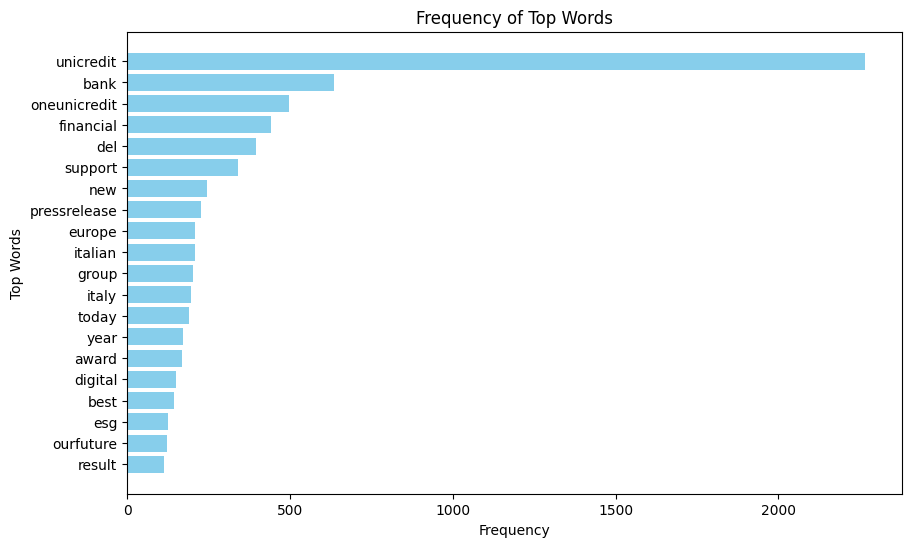

Top Words       Frequency
------------  -----------
unicredit            2266
bank                  636
oneunicredit          496
financial             442
del                   395
support               341
new                   245
pressrelease          228
europe                209
italian               208
group                 203
italy                 196
today                 191
year                  173
award                 170
digital               149
best                  143
esg                   127
ourfuture             124
result                115


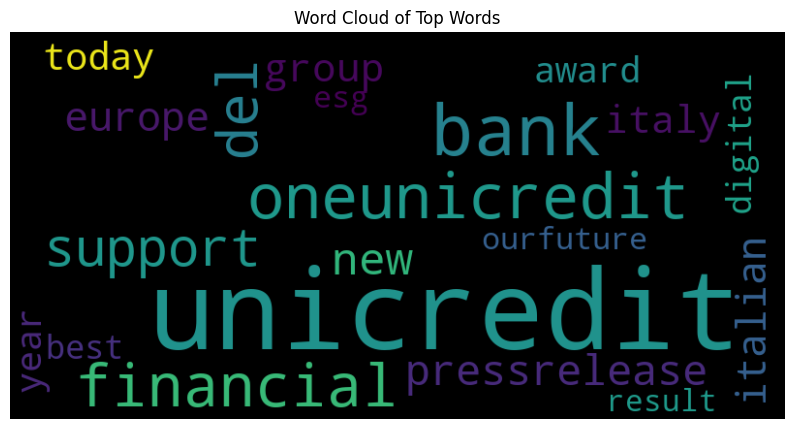

In [583]:
# Sample documents
documents = df6['Tweet'].tolist()

# Text preprocessing function
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and lowercasing
    tokens = [word.lower() for word in tokens if word.isalpha()]
    
    # Removing stop words
    stop_words = set(ENGLISH_STOP_WORDS)
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

# Preprocess the documents
preprocessed_documents = [preprocess_text(doc) for doc in documents]

# Create a pipeline with CountVectorizer and LatentDirichletAllocation
num_topics = 1
pipeline = Pipeline([
    ('vect', CountVectorizer(stop_words=['like', 'make','need', 'http', 'di', 'la', 'il'], ngram_range=(1,1))),
    ('lda', LatentDirichletAllocation(n_components=num_topics, random_state=42)),
])

# Fit the pipeline on the preprocessed data
pipeline.fit(preprocessed_documents)

# Get the top words for each topic
feature_names = pipeline.named_steps['vect'].get_feature_names_out()
lda_components = pipeline.named_steps['lda'].components_
top_words_per_topic = []

for topic_weights in lda_components:
    top_word_indices = topic_weights.argsort()[-20:][::-1]
    top_words = [feature_names[i] for i in top_word_indices]
    top_words_per_topic.append(top_words)

# Count the frequency of each top word within each document
top_word_counts = {}

for doc in preprocessed_documents:
    for top_words in top_words_per_topic:
        for word in top_words:
            if word in doc:
                if word in top_word_counts:
                    top_word_counts[word] += 1
                else:
                    top_word_counts[word] = 1

# Sort the top words by frequency
sorted_top_words = sorted(top_word_counts.items(), key=lambda x: x[1], reverse=True)

# Extract top words and their frequencies
top_words = [word for word, count in sorted_top_words]
word_frequencies = [count for word, count in sorted_top_words]

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_words)), word_frequencies, color='skyblue')
plt.yticks(range(len(top_words)), labels=top_words)
plt.xlabel('Frequency')
plt.ylabel('Top Words')
plt.title('Frequency of Top Words')
plt.gca().invert_yaxis()  # Invert y-axis to have the most frequent word on top
plt.show()

# Create a table
table_data = [(word, freq) for word, freq in zip(top_words, word_frequencies)]

# Print the table
print(tabulate(table_data, headers=['Top Words', 'Frequency']))

# Combine top words and their frequencies into a dictionary
word_freq_dict = {word: freq for word, freq in zip(top_words, word_frequencies)}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freq_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Words')
plt.show()